# **Bank Customer Churn Model**

# **Objective:**
The objective of a bank customer churn model is to predict which customers are likely to leave the bank (i.e., churn) based on various factors

# **Data source:**
The data source is the Bank Churn_Modelling.csv file from the GitHub repository here. This dataset contains information about approximately 10,000 bank clients and includes various features relevant for churn prediction.

In [ ]:
# importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import Data
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.duplicated('CustomerId').sum()#returns no.of duplicates from df

0

In [ ]:
df.set_index('CustomerId', inplace=True) #Making CustomerId as index of df

In [ ]:
df.info()# initially dataframe had 13 coloumns after changing index no.of columns becomes 12

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [ ]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Data processing
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [ ]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [ ]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)#clubbing 2,3,4 to 1

In [ ]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [ ]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [ ]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [ ]:
df['Zero balance']=np.where(df['Balance']>0,1,0)

<Axes: >

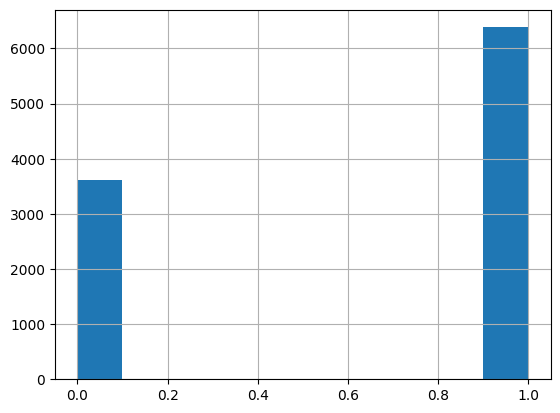

In [ ]:
df['Zero balance'].hist()

In [ ]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero balance'],
      dtype='object')

In [ ]:
x = df.drop(['Surname','Churn'],axis=1)

In [ ]:
y = df['Churn']

In [ ]:
x.shape,y.shape

((10000, 11), (10000,))

# **Handling Data**

under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=2529)
x_rus,y_rus = rus.fit_resample(x,y)

In [ ]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

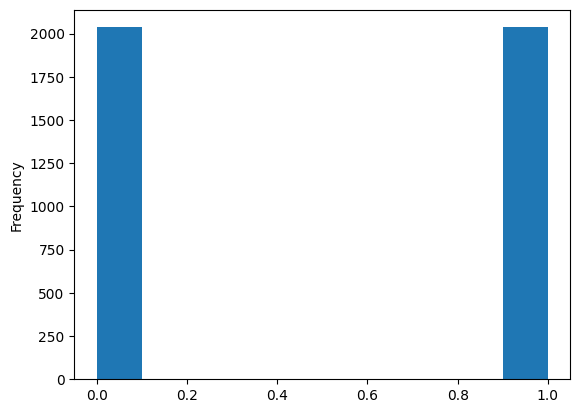

In [ ]:
y_rus.plot(kind='hist')

# **Random under sampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2529)
x_ros,y_ros = ros.fit_resample(x,y)

In [ ]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

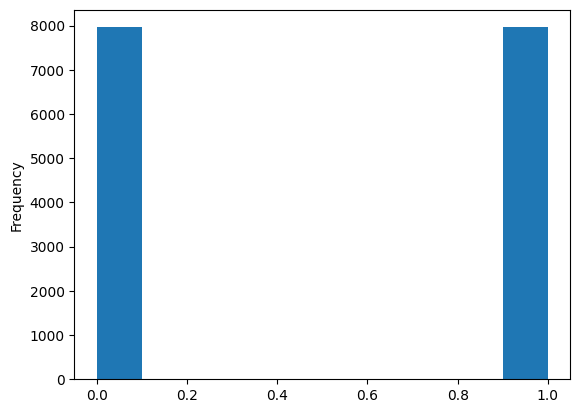

In [ ]:
y_ros.plot(kind='hist')

In [ ]:
#Split Original data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_rus,y_rus,test_size=0.3,random_state=2529)

In [ ]:
#Split Random Under Sample Data
from sklearn.model_selection import train_test_split
x_train_rus,x_test_rus,y_train_rus,y_test_rus = train_test_split(x_rus,y_rus,test_size=0.3,random_state=2529)

In [ ]:
#Split Random Over Sample Data
from sklearn.model_selection import train_test_split
x_train_ros,x_test_ros,y_train_ros,y_test_ros = train_test_split(x_ros,y_ros,test_size=0.3,random_state=2529)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

**Standardize Original data**

In [ ]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Standardize Random Under Sample Data**

In [ ]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Standardize Random Over Sample Data**

In [ ]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

#**Support vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [ ]:
y_pred = svc.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

#**Model Accuracy for original data**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[470, 157],
       [173, 423]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [ ]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'C': [0.1,1,10],
    'kernel':['rbf'],
    'gamma' :[1,0.1,0.01],
    'class_weight':['balanced']
}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [ ]:
grid_predictions = grid.predict(x_test)

In [ ]:
confusion_matrix(y_test,grid_predictions)

array([[475, 152],
       [172, 424]])

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.73      0.73      1223
weighted avg       0.74      0.74      0.73      1223



# **Model accuracy with Random Under Sample**

In [ ]:
svc_rus = SVC()
svc_rus.fit(x_train_rus,y_train_rus)
y_pred_rus= svc_rus.predict(x_test_rus)

In [ ]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[470, 157],
       [174, 422]])

In [ ]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [ ]:
param_grid = {
    'C': [0.1,1,10],
    'kernel':['rbf'],
    'gamma' :[1,0.1,0.01],
    'class_weight':['balanced']
}

In [ ]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [ ]:
grid_predictions_rus = grid_rus.predict(x_test_rus)

In [ ]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[476, 151],
       [172, 424]])

In [ ]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



# **Model accuracy with Random Over Sample**

In [ ]:
svc_ros = SVC()
svc_ros.fit(x_train_ros,y_train_ros)
y_pred_ros= svc_ros.predict(x_test_ros)

In [ ]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1823,  556],
       [ 626, 1773]])

In [ ]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [ ]:
praram_grid = {
    'C': [0.1,1,10],
    'kernel':['rbf'],
    'gamma' :[1,0.1,0.01],
    'class_weight':['balanced']
}

In [ ]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [ ]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]])

In [ ]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



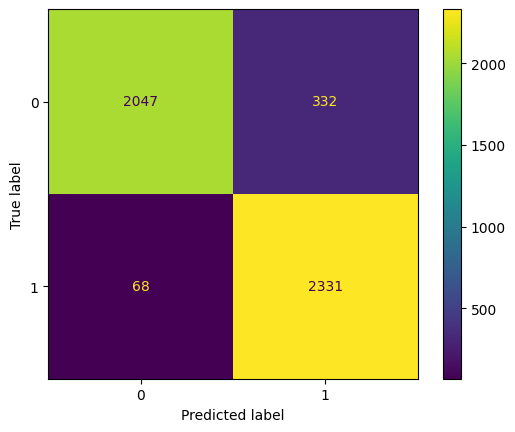

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm =confusion_matrix(y_test_ros,grid_predictions_ros)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()